# SCRIPT FOR ANALYSIS OF CELLS ANALYZED WITH Xenium

This notebook is used to identify cell populations from a Xenium dataset. The analysis is based on Scanpy (documentation in  https://scanpy.readthedocs.io/en/stable/index.html) and Squidpy (documentation in https://squidpy.readthedocs.io/en/stable/)

## Loading the packages

We import the packages needed for it. If something fails, means that we haven't installed something in the environment

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import xb.plotting as xp

## Importing the data and creating an anndata object

We import the adata object for each of the three technical replicates. We remove articitial/control genes and we add a tag to every cell to distinguish the replicate they are comming from

In [22]:
saving_path=r'../../data/processed_adata/'
adataref=sc.read(saving_path+'/adata_msbrain_3rep_withclusters.h5ad')

In [ ]:
adata1=sc.read(r"../../data/unprocessed_adata/ms_brain_rep1.h5ad")
adata2=sc.read(r"../../data/unprocessed_adata/ms_brain_rep2.h5ad")
adata3=sc.read(r"../../data/unprocessed_adata/ms_brain_rep3.h5ad")
adata1=adata1[:,adata1.var['in_panel']]
adata2=adata2[:,adata2.var['in_panel']]
adata3=adata3[:,adata3.var['in_panel']]
adata1.obs['replicate']='1'
adata2.obs['replicate']='2'
adata3.obs['replicate']='3'

In [4]:
adata=sc.concat([adata1,adata2,adata3])

/home/sergioms/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [26]:
adataref.obs['cytoplasm_area']=adataref.obs['cell_area']-adataref.obs['nucleus_area']
adataref.obs['nuclei_proportion']=adataref.obs['nucleus_area']/adataref.obs['cell_area']

<Figure size 640x480 with 0 Axes>

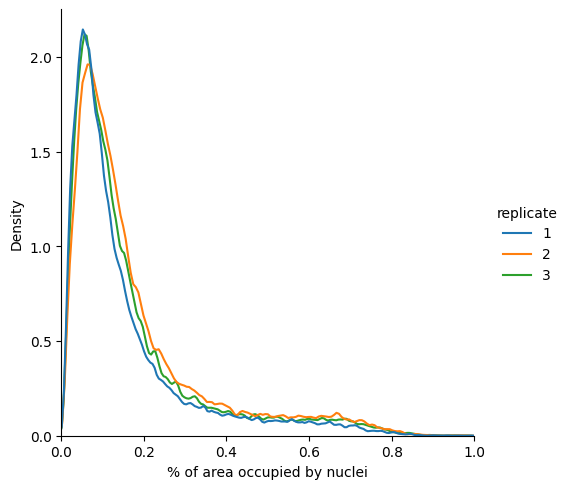

<Figure size 640x480 with 0 Axes>

In [27]:
sns.displot(adataref.obs, x="nuclei_proportion",hue='replicate', kind="kde", bw_adjust=.25)
plt.xlim([0,1])
plt.xlabel('% of area occupied by nuclei')
plt.figure('../../figures/quality_plots/area_occupied_by_nuclei_msbrain_replicates_by_rep.pdf')

<Figure size 640x480 with 0 Axes>

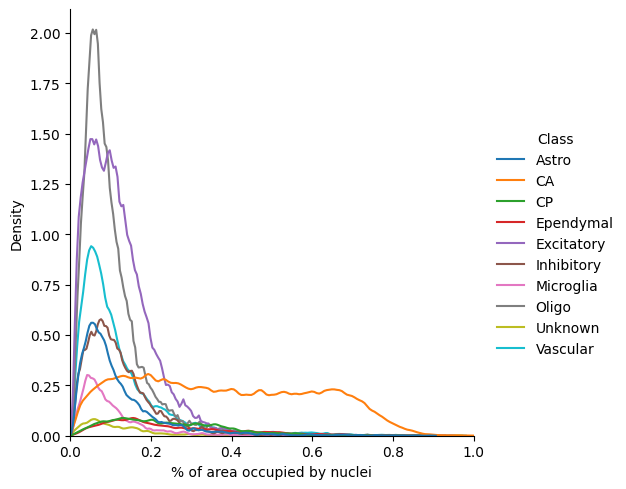

<Figure size 640x480 with 0 Axes>

In [29]:
sns.displot(adataref.obs, x="nuclei_proportion",hue='Class', kind="kde", bw_adjust=.25)
plt.xlim([0,1])
plt.xlabel('% of area occupied by nuclei')
plt.figure('../../figures/quality_plots/area_occupied_by_nuclei_msbrain_replicates_by_class.pdf')